# 決定木
- 回帰にも分類にも使用できるアルゴリズム
- 人間の意思決定のロジックに近いので解釈しやすい
- 単体では精度がひくい

# 決定木のアルゴリズム概要
- データを二つの領域に分割していく
- 回帰の場合、領域の学習データの平均値を予測値とする
- 分類の場合は多数決

# 領域の分割方法
- 分割後の2つの領域の字に不純度の合計が最小になるように分けていく
- ジニ不純度：どれだけ綺麗に分けられるかを表す指標

# 決定木の過学習
- 分割をすすめていくとモデルが複雑になり過学習となる。
- 精度が下がり解釈性が下がり汎化性能も下がる。なお学習にも時間がかかる。　ー＞　途中で分割をぺたり、木を剪定し小さくする必要もある。

In [2]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
df = sns.load_dataset('tips')

In [10]:
# カテゴリー変数を量的変数へ。hon-hot-encodingの形になる
df = pd.get_dummies(df, drop_first=True)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
df

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [11]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4) # 4段階まで
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [14]:
y_pred = model.predict(X_test)
y_pred[:10]

array([2.65967742, 3.48      , 2.65967742, 3.075     , 4.1       ,
       3.075     , 3.48      , 3.36428571, 3.48      , 4.73823529])

In [15]:
y_test[:10]

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
92     1.00
76     3.08
181    5.65
188    3.50
180    3.68
Name: tip, dtype: float64

In [16]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.1060246260428703

In [18]:
# 決定係数
model.score(X_test, y_test)

0.3590618660303134

# 　決定木の可視化

In [19]:
y_train.loc[X_train[X_train['total_bill']>=20.49].index].mean()

3.948

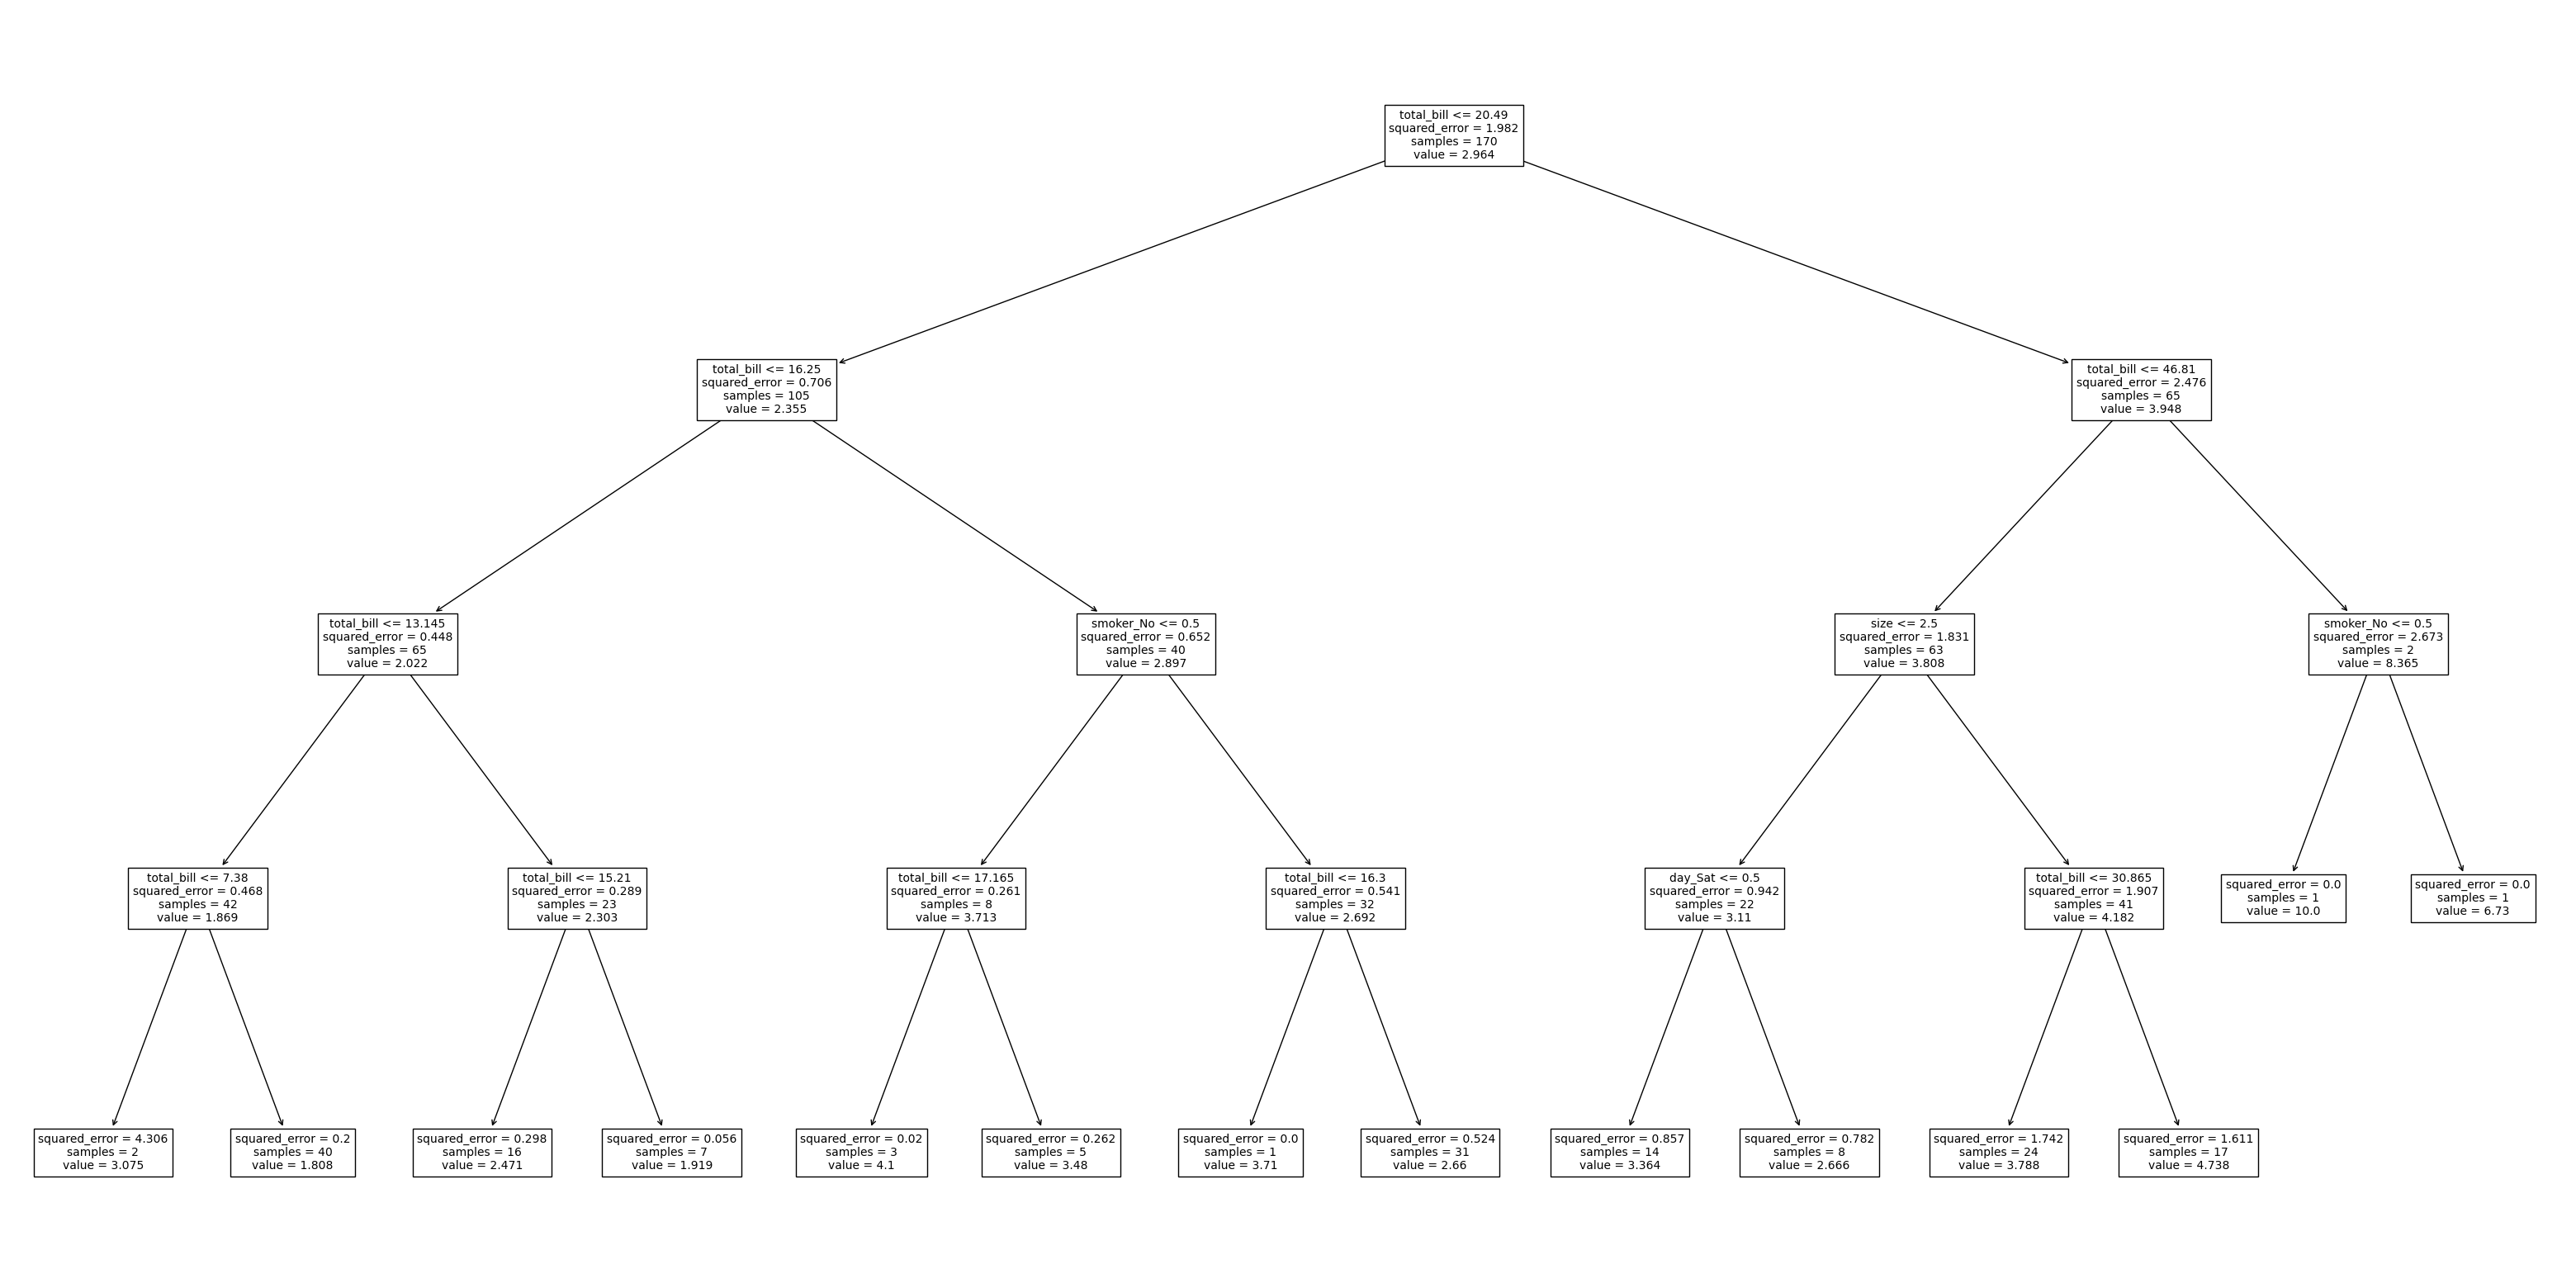

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
_ = tree.plot_tree(model, fontsize=10, feature_names=model.feature_names_in_)

In [12]:
print(tree.export_text(model, feature_names=list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

In [13]:
model.feature_importances_

array([0.85278323, 0.10370839, 0.        , 0.03169922, 0.        ,
       0.01180916, 0.        , 0.        ])

In [14]:
model.feature_names_in_

array(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

In [16]:
model = tree.DecisionTreeRegressor(random_state=0)

In [18]:
path = model.cost_complexity_pruning_path(X_train, y_train)

In [19]:
eff_alphas = path.ccp_alphas

In [21]:
eff_alphas

array([0.00000000e+00, 1.04491579e-17, 1.56737368e-17, 4.41176471e-07,
       1.17647059e-06, 1.76470588e-06, 2.64705882e-06, 2.64705882e-06,
       2.64705882e-06, 2.64705882e-06, 2.64705882e-06, 2.64705882e-06,
       2.64705882e-06, 2.64705882e-06, 3.67647059e-06, 7.35294118e-06,
       1.05882353e-05, 1.44117647e-05, 1.88235294e-05, 2.94117647e-05,
       4.23529412e-05, 5.76470588e-05, 5.76470588e-05, 7.52941176e-05,
       8.24509804e-05, 8.50000000e-05, 9.92647059e-05, 1.06176471e-04,
       1.29705882e-04, 1.34215686e-04, 1.42352941e-04, 1.69411765e-04,
       1.83823529e-04, 1.89803922e-04, 1.89803922e-04, 2.01323529e-04,
       2.14411765e-04, 2.16568627e-04, 2.33382353e-04, 2.40941176e-04,
       3.07247899e-04, 3.20294118e-04, 3.52941176e-04, 3.89117647e-04,
       4.10000000e-04, 4.52235294e-04, 4.94215686e-04, 5.50784314e-04,
       5.57098039e-04, 5.81252101e-04, 5.93137255e-04, 7.35294118e-04,
       7.65974026e-04, 7.94117647e-04, 8.71911765e-04, 9.80392157e-04,
      